NLP Project

Anna Dalsace

Tomer Zemelman

# Part A
EDA and Text Preprocessing

In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports and data loading

In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Let's get the data and see the first 5 lines

In [ ]:
df_ir = pd.read_csv('/content/drive/My Drive/NLP/Project/ireland-news-headlines.csv')
# df_ir = pd.read_csv('/content/ireland-news-headlines.csv')
df_ir.head()

,publish_date,headline_category,headline_text
0,19960102,news,UUP sees possibility of voting Major out
1,19960102,news,Pubs targeted as curbs on smoking are extended
2,19960102,news,Papers reveal secret links with O'Neill cabinet
3,19960102,news,Domestic chaos as Italy takes EU presidency
4,19960102,news,Learning about the star to which we owe life


Let's check the types of the different columns

In [ ]:
df_ir.dtypes

publish_date          int64
headline_category    object
headline_text        object
dtype: object

Let's check if there are some null values

In [ ]:
df_ir.isnull().sum()

publish_date         0
headline_category    0
headline_text        7
dtype: int64

Let's check the initial size of our dataframe

In [ ]:
df_ir.shape

(1611495, 3)

## Data Cleaning and Preprocessing

Let's drop the records where the healine text is null (as these are unuseful records) and let's check the new size of the dataframe

In [ ]:
df_ir  = df_ir[~df_ir['headline_text'].isnull()]
df_ir.shape

(1611488, 3)

Let's remove HTML anchors that might be in the headline_text field as well as replace the non-breaking space character (\xa0) with a regular space.

In [ ]:
def preprocess(headline):
    headline = headline.str.replace("(<br/>)", "")
    headline = headline.str.replace('(<a).*(>).*(</a>)', '')
    headline = headline.str.replace('(&amp)', '')
    headline = headline.str.replace('(&gt)', '')
    headline = headline.str.replace('(&lt)', '')
    headline = headline.str.replace('(\xa0)', ' ')
    return headline
df_ir['headline_text'] = preprocess(df_ir['headline_text'])

<ipython-input-10-cf9668bfb6cd>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  headline = headline.str.replace("(<br/>)", "")
<ipython-input-10-cf9668bfb6cd>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  headline = headline.str.replace('(<a).*(>).*(</a>)', '')
<ipython-input-10-cf9668bfb6cd>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  headline = headline.str.replace('(&amp)', '')
<ipython-input-10-cf9668bfb6cd>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  headline = headline.str.replace('(&gt)', '')
<ipython-input-10-cf9668bfb6cd>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  headline = headline.str.replace('(&lt)', '')
<ipython-input-10-cf9668bfb6cd>:7: FutureWarning: The default value of regex will change from True to Fal

Let's do some festure engineering, and create new features in the data based on our original ones. For example the lower_headline feature is a lower case version of the healine_text field so we will be able to use it to check some words frequency.

In [ ]:
df_ir['headline_len'] = df_ir['headline_text'].astype(str).apply(len)
df_ir['word_count'] = df_ir['headline_text'].apply(lambda x: len(str(x).split()))
df_ir['lower_headline'] = df_ir['headline_text'].apply(lambda x: x.lower() )
df_ir['general_category'] = df_ir['headline_category'].apply(lambda x: x.split(".")[0])

df_ir['date']=df_ir.publish_date.apply(lambda x:datetime.datetime.strptime(str(x),'%Y%m%d').strftime('%Y-%m-%d'))
df_ir['year']=df_ir.date.apply(lambda x:x.split('-')[0])
df_ir['month']=df_ir.date.apply(lambda x:x.split('-')[1])
df_ir['day']=df_ir.date.apply(lambda x:x.split('-')[2])
df_ir.head()

,publish_date,headline_category,headline_text,headline_len,word_count,lower_headline,general_category,date,year,month,day
0,19960102,news,UUP sees possibility of voting Major out,40,7,uup sees possibility of voting major out,news,1996-01-02,1996,01,02
1,19960102,news,Pubs targeted as curbs on smoking are extended,46,8,pubs targeted as curbs on smoking are extended,news,1996-01-02,1996,01,02
2,19960102,news,Papers reveal secret links with O'Neill cabinet,47,7,papers reveal secret links with o'neill cabinet,news,1996-01-02,1996,01,02
3,19960102,news,Domestic chaos as Italy takes EU presidency,43,7,domestic chaos as italy takes eu presidency,news,1996-01-02,1996,01,02
4,19960102,news,Learning about the star to which we owe life,44,9,learning about the star to which we owe life,news,1996-01-02,1996,01,02


##Label distribution and reduction

Let's explore the distribution of the different headline categories to understand if we need to reduce the number of labels.

Let's see the inital number of different healine categories

In [ ]:
len(df_ir['headline_category'].unique())

103

Let's see the distribution of the rarest headlines categories

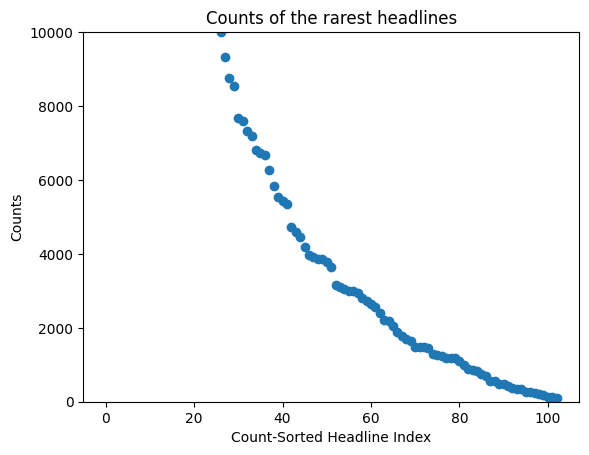

In [ ]:
vals = df_ir['headline_category'].value_counts().values
x = np.arange(len(vals))
plt.scatter(x, vals)
plt.ylim(0, 10000)
plt.xlabel('Count-Sorted Headline Index')
plt.ylabel('Counts')
plt.title('Counts of the rarest headlines')
plt.show()

Let's have a look at the 50 rarest headline categories

In [ ]:
df_ir['headline_category'].value_counts().tail(50)

business.personal-finance                 3093
culture.stage                             3052
news.world.africa                         2998
culture.music.album-reviews               2992
news.social.beliefs                       2944
news.law.courts                           2817
business.manufacturing                    2733
news.law.courts.circuit-court             2641
lifestyle.fashion                         2576
business.economy.europe                   2393
culture.heritage                          2218
culture.design                            2185
business.work                             2056
business.economy.ireland                  1886
business.markets.equities                 1766
news.law.courts.criminal-court            1710
lifestyle.abroad                          1642
news.law.courts.district-court            1493
lifestyle.homes.fine-art-antiques         1491
lifestyle.food.recipes                    1490
business.construction                     1451
business.econ

As headlines are more rare, its less likely that a model will learn them properly.

All headlines with less than 3,000 counts has a parent headline, lets aggregate headlines bellow counts of 3,000 threshold


In [ ]:
def trim_categories(df, threshold):
    while True:
        counts = df['headline_category'].value_counts()
        min_count = counts.min()
        if min_count >= threshold:
            break

        categories = counts[counts == min_count].index

        for category in categories:
            print(category, 'trimmed into:',category.rsplit(".", 1)[0] )
            df.loc[df['headline_category']==category, 'headline_category'] = category.rsplit(".", 1)[0]

    return df

threshold = 3000
df = trim_categories(df_ir, threshold)

news.health.coronavirus trimmed into: news.health
lifestyle.abroad.working-abroad trimmed into: lifestyle.abroad
business.markets.bonds trimmed into: business.markets
news.technology trimmed into: news
lifestyle.food.restaurant trimmed into: lifestyle.food
culture.tuarascail trimmed into: culture
lifestyle.travel.long-haul trimmed into: lifestyle.travel
lifestyle.homes.take-five trimmed into: lifestyle.homes
news.law.courts.supreme-court trimmed into: news.law.courts
lifestyle.food.restaurant-reviews trimmed into: lifestyle.food
lifestyle.travel.europe trimmed into: lifestyle.travel
business.economy.employment trimmed into: business.economy
business.economy.public-finances trimmed into: business.economy
lifestyle.homes.gardens trimmed into: lifestyle.homes
lifestyle.travel.ireland trimmed into: lifestyle.travel
news.law.courts.coroners-court trimmed into: news.law.courts
lifestyle.fashion.beauty trimmed into: lifestyle.fashion
business.companies trimmed into: business
news.offbeat trim

Now let's check again the number of different headline categories

In [ ]:
len(df_ir['headline_category'].unique())

57

##Categories distributions

Let's see the distribution of the top 10 categories over the dataset, over the years, months, and days in the month.

Looking at the distribution of the top ten categories over time reveals a tendency to specify the category with time and add sub-categories. The number of instances labelled as 'news' has decreased significantly over the years.

Text(0.5, 0, 'day')

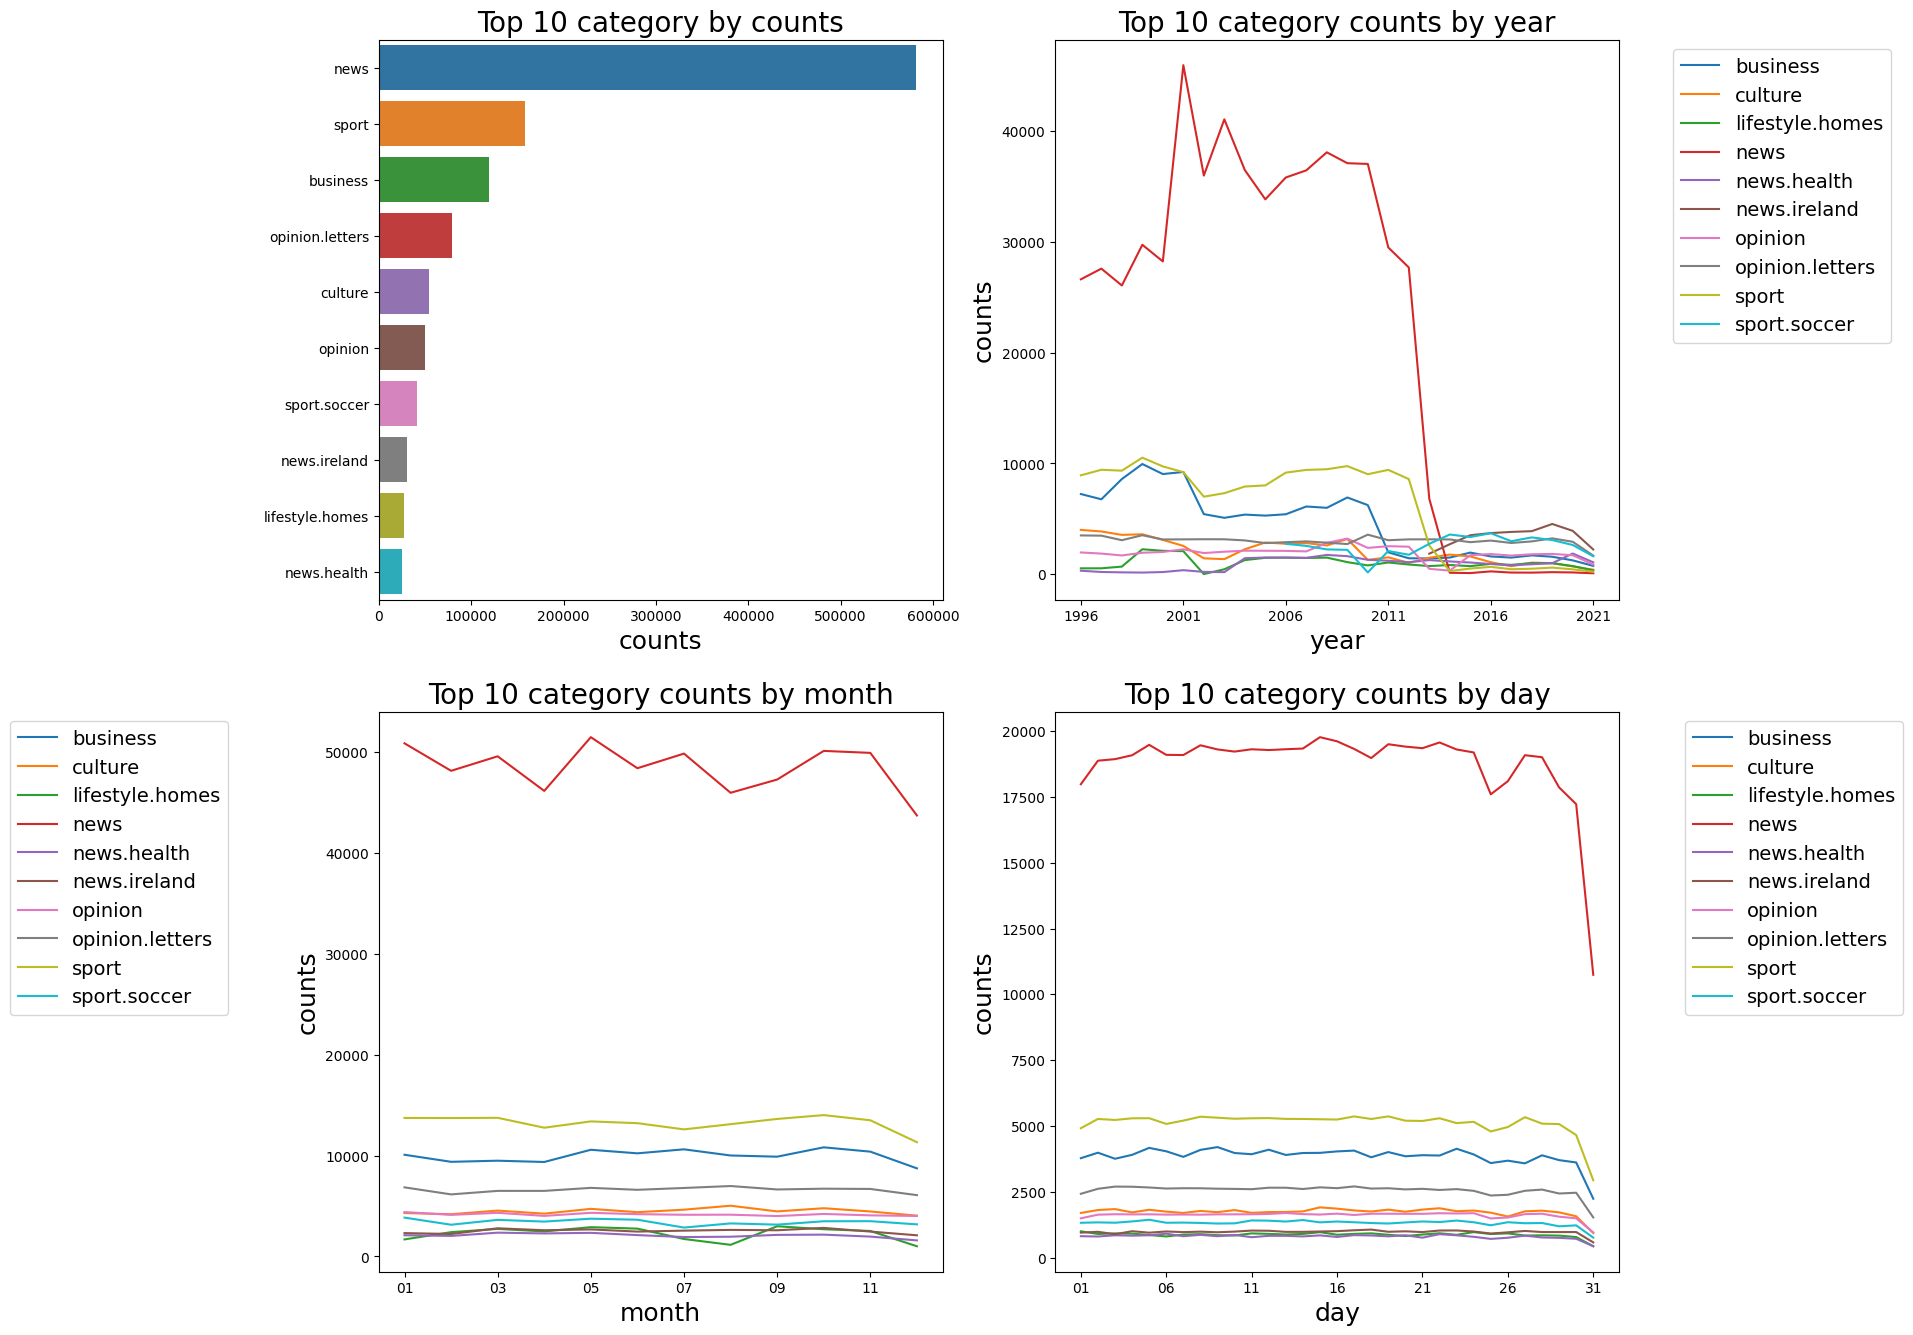

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(16,16))
Top10_category=df_ir[df_ir['headline_category'].isin(list(df_ir.headline_category.value_counts()[:10].index[:10]))]
sns.barplot(y=Top10_category.headline_category.value_counts().index,x=Top10_category.headline_category.value_counts(),ax=ax[0,0])
ax[0,0].set_title("Top 10 category by counts",size=20)
ax[0,0].set_xlabel('counts',size=18)
ax[0,0].set_ylabel('')

Top10_category.groupby(['year','headline_category'])['headline_category'].agg('count').unstack('headline_category').plot(ax=ax[0,1])
ax[0,1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.5,1))
ax[0,1].set_title("Top 10 category counts by year",size=20)
ax[0,1].set_ylabel('counts',size=18)
ax[0,1].set_xlabel('year',size=18)

Top10_category.groupby(['month','headline_category'])['headline_category'].agg('count').unstack('headline_category').plot(ax=ax[1,0])
ax[1,0].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(-0.25,1))
ax[1,0].set_title("Top 10 category counts by month",size=20)
ax[1,0].set_ylabel('counts',size=18)
ax[1,0].set_xlabel('month',size=18)

Top10_category.groupby(['day','headline_category'])['headline_category'].agg('count').unstack('headline_category').plot(ax=ax[1,1])
ax[1,1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.10,1))
ax[1,1].set_title("Top 10 category counts by day",size=20)
ax[1,1].set_ylabel('counts',size=18)
ax[1,1].set_xlabel('day',size=18)

Let's look at the distribution of records over years, months, days in month and over publication date.

We can see a tendency to publish less articles over the years. Moreover, less articles are published in december and during the end of the month.

Text(0, 0.5, 'counts')

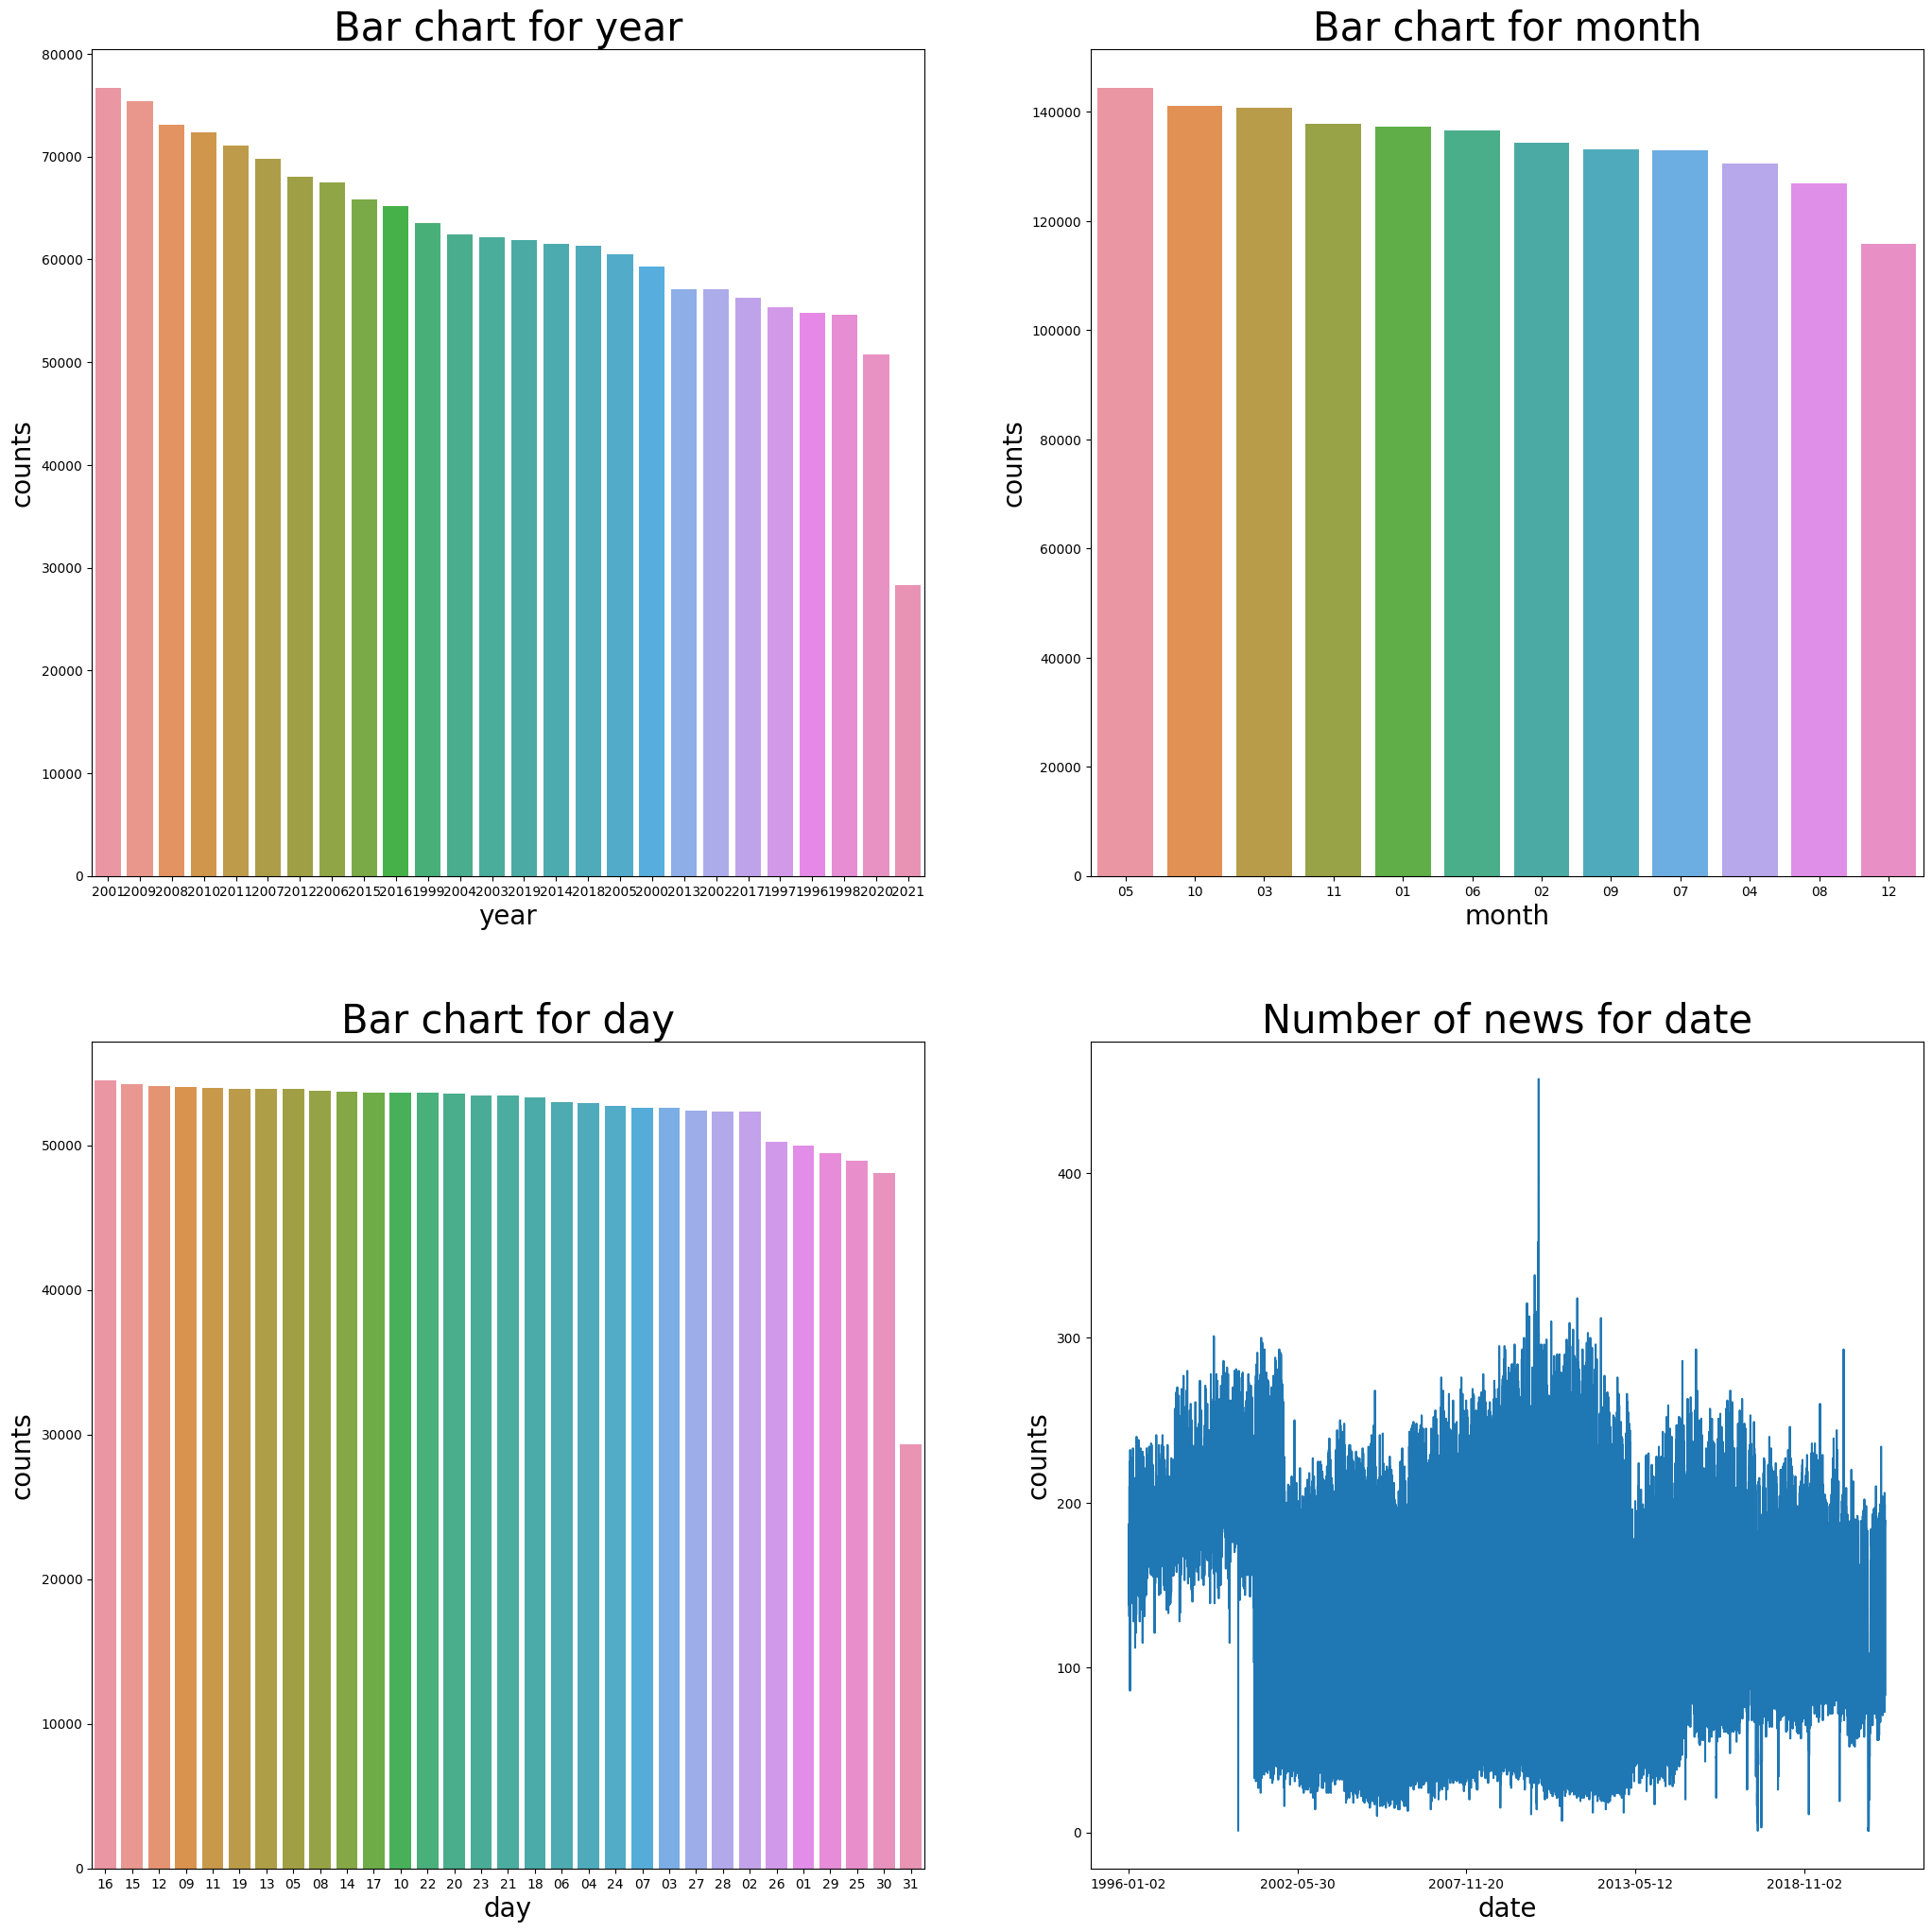

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(25,25))
sns.barplot(x=df_ir.year.value_counts().index,y=df_ir.year.value_counts(),ax=ax[0,0])
ax[0,0].set_title("Bar chart for year",size=30)
ax[0,0].set_xlabel('year',size=20)
ax[0,0].set_ylabel('counts',size=20)

sns.barplot(x=df_ir.month.value_counts().index,y=df_ir.month.value_counts(),ax=ax[0,1])
ax[0,1].set_title("Bar chart for month",size=30)
ax[0,1].set_xlabel('month',size=20)
ax[0,1].set_ylabel('counts',size=20)

sns.barplot(x=df_ir.day.value_counts().index,y=df_ir.day.value_counts(),ax=ax[1,0])
ax[1,0].set_title("Bar chart for day",size=30)
ax[1,0].set_xlabel('day',size=20)
ax[1,0].set_ylabel('counts',size=20)

df_ir.groupby(['date'])['headline_category'].agg('count').plot(ax=ax[1,1])
ax[1,1].set_title("Number of news for date",size=30)
ax[1,1].set_xlabel('date',size=20)
ax[1,1].set_ylabel('counts',size=20)

##General Categories distribution

Let's see what are the different general categories

In [ ]:
df_ir['general_category'].unique()

array(['news', 'culture', 'opinion', 'business', 'sport', 'lifestyle'],
      dtype=object)

Let's look at the distribution of the general categories.

We see that the most frequent cateogry is news and that it is much more frequent than the others.

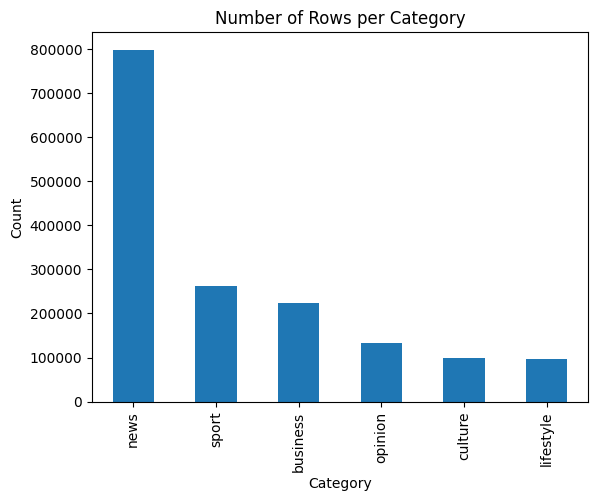

In [ ]:
category_counts = df_ir['general_category'].value_counts()
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Rows per Category')
plt.show()

##Word frequencies

In order to generate a wordcloud and measure the frequency of words in the headlines, let's combine all the words into one string. Notice we use the lower_headline feature to make sure no difference will be made based on uppercase letters.

In [ ]:
text = " ".join(review for review in df_ir.lower_headline)
print ("There are {} words in the combination of all headlines.".format(len(text)))
print(text[:500])

There are 71123782 words in the combination of all headlines.
uup sees possibility of voting major out pubs targeted as curbs on smoking are extended papers reveal secret links with o'neill cabinet domestic chaos as italy takes eu presidency learning about the star to which we owe life eu proposal for 'skills cards' to detail education roads authority asked to switch to use of concrete ucd cancels intake into evening course when days are seconds longer john major's future may lie in unionist hands high school student found dead from cold on co down hillsid


Now let's generate the wordcloud adding some stopwords to avoid very common words. As the data comes from an Irish newspaper, we want to avoid words such Ireland, Dublin, new, irish... as they will not necessarly add some impactful meaning in the frequency. We do expect those words to be frequent but their added value to the understanding of the data is not very high.

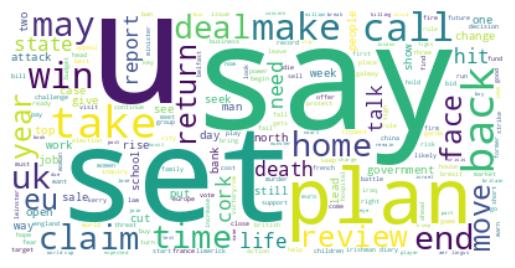

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["ireland", "dublin", "new", "irish","will"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords =stopwords , background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Let's now do the same process but for each general category to see if we find a specific lexicon for each category.

1 1 2 3
news
There are 36881974 words in the combination of all headlines.
uup sees possibility of voting major out pubs targeted as curbs on smoking are extended papers reveal secret links with o'neill cabinet domestic chaos as italy takes eu presidency learning about the star to which we owe life eu proposal for 'skills cards' to detail education roads authority asked to switch to use of concrete ucd cancels intake into evening course when days are seconds longer john major's future may lie in unionist hands high school student found dead from cold on co down hillsid
culture
There are 3993664 words in the combination of all headlines.
internal soundings on the piano highs and lows enough cranberry sauce highs and blows a chain of pantos past a sing song with a difference junkster/the bedhangers/the sewing room a feast and a famine tb in a sanatorium of the imagination policing the famine era drudgery of being a 20th century chatelaine church survival pivots on authority of love not p

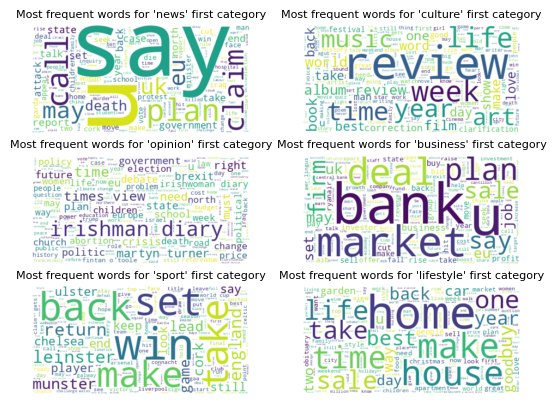

In [ ]:
x=1
y=1
m = 2
n = int(len(df_ir['general_category'].unique())/2)
counter = 1
print(x, y, m, n)
# fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(20,10))
# i=0
# j=0

for cat in df_ir['general_category'].unique():
  print(cat)
  df_cat = df_ir[df_ir['general_category']==cat]
  text = " ".join(review for review in df_cat.lower_headline)
  print ("There are {} words in the combination of all headlines.".format(len(text)))
  # print(text[:500])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  stopwords.update(["ireland", "dublin", "new", "irish","will"])

  # ax = axes[i][j]
  # Generate a word cloud image
  # wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(text)
  wordcloud = WordCloud(stopwords =stopwords , background_color="white").generate(text)

  # Display the generated image:
  # the matplotlib way:
  plt.subplot(n,m, counter)
  # ax.figure(figsize=(10,6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title("Most frequent words for '{}' first category".format(cat), fontsize = 8)
  counter+=1
plt.show()

From the result above, we see there's a specific lexicon for every general category. For example, for the business first/general category, we can see words like 'bank', 'market', 'deal' etc...